## Importando Bibliotecas

In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Input, Dense
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.models import Model
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Using TensorFlow backend.


## Pre-processamento dos dados
**Carregando os dados de treino e teste:**

In [2]:
train_images = pd.read_csv('../fashion-mnist_train.csv')
test_images = pd.read_csv('../fashion-mnist_test.csv')

**Separando as labels do conjuntos:**

In [3]:
train_labels=train_images.loc[:, ['label']]
train_images=train_images.drop(['label'], axis=1)
test_labels=test_images.loc[:, ['label']]
test_images=test_images.drop(['label'], axis=1)

**Normalizando os data-sets:**

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0


----------------------
## Construção do modelo base
**Esta rede será utilizada posteriomente para comparações entre os modelos de dimensionalidade reduzida utilizando PCA e autoencoder.**

**Definição da estrutura do modelo por meio do Keras Sequential:**

In [5]:
model = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(784)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treino do modelo:**

In [7]:
model.fit(train_images, train_labels, epochs=5, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.5237 - accuracy: 0.8119 - val_loss: 0.4186 - val_accuracy: 0.8542
Epoch 2/5
48000/48000 [==============================] - 7s 138us/sample - loss: 0.3906 - accuracy: 0.8574 - val_loss: 0.3887 - val_accuracy: 0.8614
Epoch 3/5
48000/48000 [==============================] - 6s 122us/sample - loss: 0.3507 - accuracy: 0.8716 - val_loss: 0.3989 - val_accuracy: 0.8594
Epoch 4/5
48000/48000 [==============================] - 6s 123us/sample - loss: 0.3294 - accuracy: 0.8791 - val_loss: 0.3439 - val_accuracy: 0.8768
Epoch 5/5
48000/48000 [==============================] - 6s 122us/sample - loss: 0.3090 - accuracy: 0.8861 - val_loss: 0.3731 - val_accuracy: 0.8622


**Verificação dos resultados do modelo:**

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.3672 - accuracy: 0.8591
Model - 3 layers - test loss: 36.72423686504364
Model - 3 layers - test accuracy: 85.90999841690063


-----------------------------
## Redução de Dimensionalidade Usando Principal component analysis (PCA)

**Definição do número de componentes:**

In [9]:
pca = PCA(n_components=3)

**Construção dos novos datasets de treino e de teste com dimensões reduzidas usando o PCA:**

In [10]:
print(train_images)
train_images_r = pca.fit(train_images).transform(train_images)
test_images_r = pca.fit(test_images).transform(test_images)

       pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3         0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
...       ...     ...     ...       ...       ...     ...     ...       ...   
59995     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59996     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59997     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59998     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59999     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

       pixel9  pixel10  ...  pixel775  pixel776  pi

**Alteração do tipo dos dados de numpy array para pandas dataframe:**

In [11]:
train_images_r = pd.DataFrame(data=train_images_r)
test_images_r= pd.DataFrame(data=test_images_r)
print(train_images_r)

              0         1         2
0      3.686333  4.960529 -0.051232
1     -4.376434  3.861059 -1.949433
2      7.265152  1.568757  2.315239
3      3.227788 -2.325256 -0.649302
4      4.146373 -4.039080 -1.515247
...         ...       ...       ...
59995  0.017613  5.188697 -5.057010
59996 -3.115212 -5.211554 -0.104906
59997  2.181650  0.451775 -0.556464
59998  1.470069  6.063398 -0.624757
59999 -3.571693  4.771146 -0.266293

[60000 rows x 3 columns]


**Definição da estrutura do modelo por meio do Keras Sequential que receberá os dados com dimensões reduzidas pelo PCA:**

In [12]:
model_r = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 9,866
Trainable params: 9,866
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [13]:
model_r.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treino do modelo:**

In [14]:
model_r.fit(train_images_r, train_labels, epochs=5, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 70us/sample - loss: 0.9828 - accuracy: 0.5944 - val_loss: 0.9232 - val_accuracy: 0.607919 - ac - ETA: 1s - l - ETA: 0s - loss: 0.9879 - accura
Epoch 2/5
48000/48000 [==============================] - 3s 66us/sample - loss: 0.8963 - accuracy: 0.6259 - val_loss: 0.8798 - val_accuracy: 0.6306
Epoch 3/5
48000/48000 [==============================] - 3s 65us/sample - loss: 0.8781 - accuracy: 0.6347 - val_loss: 0.8701 - val_accuracy: 0.6423
Epoch 4/5
48000/48000 [==============================] - 3s 65us/sample - loss: 0.8692 - accuracy: 0.6394 - val_loss: 0.8779 - val_accuracy: 0.6368
Epoch 5/5
48000/48000 [==============================] - 3s 67us/sample - loss: 0.8643 - accuracy: 0.6404 - val_loss: 0.8608 - val_accuracy: 0.6433


**Verificação dos resultados do modelo:**

In [15]:
test_loss, test_acc = model_r.evaluate(test_images_r, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.8711 - accuracy: 0.6353
Model - 3 layers - test loss: 87.1094621372223
Model - 3 layers - test accuracy: 63.52999806404114


------------------------------------------------------

## Redução de Dimensionalidade Usando Autoencoders

In [16]:
# this is the size of our encoded representations
encoding_dim = 2
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoded_input = Input(shape=(encoding_dim,))
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [17]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [18]:
#REMOVER troque o 'adadelta' pelo 'adam'
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
autoencoder.fit(train_images, train_images,epochs=5,shuffle=True,validation_data=(test_images, test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.4364 - val_loss: 0.4065
Epoch 2/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.3998 - val_loss: 0.3929
Epoch 3/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.3892 - val_loss: 0.3840
Epoch 4/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.3818 - val_loss: 0.3784
Epoch 5/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.3783 - val_loss: 0.3763


In [20]:
encoded_imgs_train = encoder.predict(train_images)
encoded_imgs_test = encoder.predict(test_images)


In [21]:
train_images_a = pd.DataFrame(data=encoded_imgs_train)
test_images_a =pd.DataFrame(data=encoded_imgs_test)

In [22]:
model_r = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(2)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_r.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 9,802
Trainable params: 9,802
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_r.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_r.fit(train_images_a, train_labels, epochs=5, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 72us/sample - loss: 1.2903 - accuracy: 0.4678 - val_loss: 1.1745 - val_accuracy: 0.5207
Epoch 2/5
48000/48000 [==============================] - 3s 67us/sample - loss: 1.1595 - accuracy: 0.5267 - val_loss: 1.1451 - val_accuracy: 0.534006 - accuracy: 
Epoch 3/5
48000/48000 [==============================] - 3s 66us/sample - loss: 1.1410 - accuracy: 0.5351 - val_loss: 1.1278 - val_accuracy: 0.5419
Epoch 4/5
48000/48000 [==============================] - 3s 69us/sample - loss: 1.1320 - accuracy: 0.5364 - val_loss: 1.1257 - val_accuracy: 0.5437
Epoch 5/5
48000/48000 [==============================] - 3s 66us/sample - loss: 1.1269 - accuracy: 0.5399 - val_loss: 1.1279 - val_accuracy: 0.5431loss: 1.1256 - ac - ETA: 0s - l


In [25]:
test_loss, test_acc = model_r.evaluate(test_images_a, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 37us/sample - loss: 1.1276 - accuracy: 0.5497
Model - 3 layers - test loss: 112.76155284881592
Model - 3 layers - test accuracy: 54.97000217437744


------------------------------------------------------

## Clustering com K-means

Optamos pela utilização das imagens reduzidas por meio do PCA, já que obtiveram por meio deste modelo os melhores resultados de predição na rede neural.

In [62]:
train_images_k = train_images_r
test_images_k = test_images_r

In [63]:
kmean_model = KMeans(n_clusters=10, random_state=10)
y_km = kmean_model.fit(train_images_k)
labels = kmean_model.labels_

In [64]:
cluster_centroids = kmean_model.cluster_centers_

In [65]:
#silhouette_avg = silhouette_score(X = train_images_k, labels = train_labels.values.ravel(), random_state=10)

In [66]:
silhouette_avg = silhouette_score(X = train_images_k, labels = train_labels.values.ravel(), random_state=10)

In [67]:
#metrics.homogeneity_score(train_labels.values.ravel(), labels)

In [68]:
metrics.v_measure_score(train_labels.values.ravel(), labels, beta=1.0)

0.45694727123110823

### Plotting train_images instances with their classifications represented as different colors

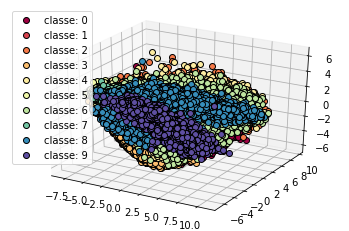

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Plotting train_images with classification
fig = plt.figure()
ax = fig.gca(projection='3d')

unique_labels = set(train_labels.values.flatten())
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

train_images_np = train_images_r.values

last_k = -1
for k, col in zip(unique_labels, colors):
    
    class_member_mask = (train_labels == k)
    indices = np.where(class_member_mask == True)
    for index in indices:
        ax.plot(train_images_np[index, 0], train_images_np[index, 1], train_images_np[index, 2],'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6, label=f"classe: {k}" if k == last_k else "")
        last_k = k
    
ax.legend()
plt.show()

### Plotando o gráfico das instâncias de treino com cores referentes aos clusters determinados pelo K-means

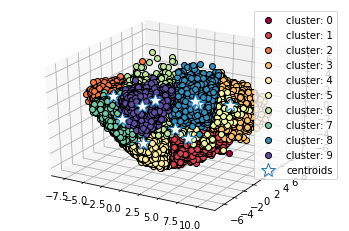

In [77]:
fig = plt.figure()
ax = fig.gca(projection='3d')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    
    class_member_mask = (labels == k)
    indices = np.where(class_member_mask == True)
    for index in indices:
        ax.plot(train_images_np[index, 0], train_images_np[index, 1], train_images_np[index, 2],'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6, label=f"cluster: {k}")

#Plotting cluster centroids
ax.plot(cluster_centroids[:, 0], cluster_centroids[:, 1], cluster_centroids[:, 2],'*', markerfacecolor=tuple([1, 1, 1, 1]),
            markersize=14, label="centroids")

ax.legend()
plt.show()

---------------------------------
## Clustering com o DBScan


In [81]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

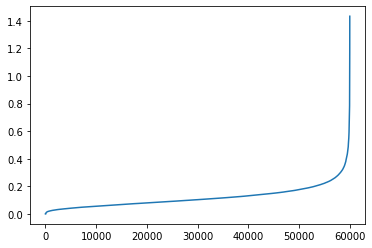

In [83]:
train_images_dbscan = train_images_r
test_images_dbscan = test_images_r

#Calculando melhor valor para o parametro épsilon
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(train_images_dbscan)
distances, indices = nbrs.kneighbors(train_images_dbscan)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [91]:
# Executando o algoritmo DBSCAN
db = DBSCAN(eps=0.38, min_samples=100).fit(train_images_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = train_labels.values.flatten()

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(train_images_dbscan, labels))

Estimated number of clusters: 7
Estimated number of noise points: 44342
Homogeneity: 0.201
Completeness: 0.568
V-measure: 0.297
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.296
Silhouette Coefficient: -0.249


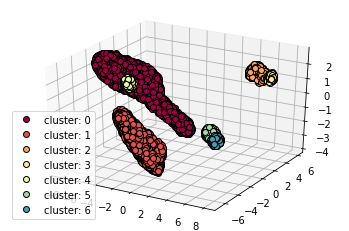

In [89]:
# Plot result

fig = plt.figure()
ax = fig.gca(projection='3d')

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

train_images_dbscan_np = train_images_dbscan.values

last_k = -1
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    else:

        class_member_mask = (labels == k)

        xy = train_images_dbscan_np[class_member_mask & core_samples_mask]
    #     ax.plot(xy[:3, 0], xy[:3, 1], xy[:3, 2], c=tuple(col))

        ax.plot(xy[:, 0], xy[:, 1], xy[:, 2],'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label=f"cluster: {k}" if k == last_k else "")
        
        last_k = k
        
        xy = train_images_dbscan_np[class_member_mask & ~core_samples_mask]
    #     ax.plot(xy[:3, 0], xy[:3, 1], xy[:3, 2], c=tuple(col))
        ax.plot(xy[:, 0], xy[:, 1], xy[:, 2],'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label=f"cluster: {k}" if k == last_k else "")
    
        
ax.legend()
plt.show()